
### Context
Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

### Data Description 
| Features  | Description |
| ------------- | ------------- |
| battery_power  | Total energy a battery can store in one time measured in mAh  |
| blue  | Has bluetooth or not  |
| clock_speed | speed at which microprocessor executes instructions  |
| dual_sim  | Has dual sim support or not |
| fc  | Front Camera mega pixels |
| four_g  | Has 4G or not  |
| int_memory  |Internal Memory in Gigabytes |
| m_dep  | Mobile Depth in cm  |
| mobile_wt  | Weight of mobile phone  |
| n_cores  |Number of cores of processor |
| pc  |Primary Camera mega pixels |
| px_height  | Pixel Resolution Height |
| px_width  |Pixel Resolution Width |
| ram  |Random Access Memory in Mega Bytes |
| sc_h  | Screen Height of mobile in cm |
| sc_w  | Screen Width of mobile in cm  |
| talk_time  |longest time that a single battery charge will last when you are   |
| three_g  | Has 3G or not  |
| touch_screen  | Has touch screen or not  |
| wifi  |Has wifi or not |
| price_range   | This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).  |

**Note :**
- Dropping fc that has 0 mega pixels
- Dropping pc that has 0 mega pixels

In [1]:
#Common necessery libraries
#### Data Processing
import pandas as pd
import numpy as np

#### Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\PURWADHIKA\MODUL 03\DATASET\train_mobil_price.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [4]:
##Checking for missing value 
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
##Checking Outliers
#First, I separate of categorical or object and numerical data types (int64 & float64)
#This separation is done to check the outliers in the numeric column using the boxplot

numeric_col = []
categorical_col = []
for i in df.columns:
    #categorical columns
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        #numeric columns
        numeric_col.append(i)
        
print('Numerical Columns ({})'.format(len(numeric_col)))
print(numeric_col)
print('-'*100)
print('Categorical Columns ({})'.format(len(categorical_col)))
print(categorical_col)

Numerical Columns (21)
['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']
----------------------------------------------------------------------------------------------------
Categorical Columns (0)
[]


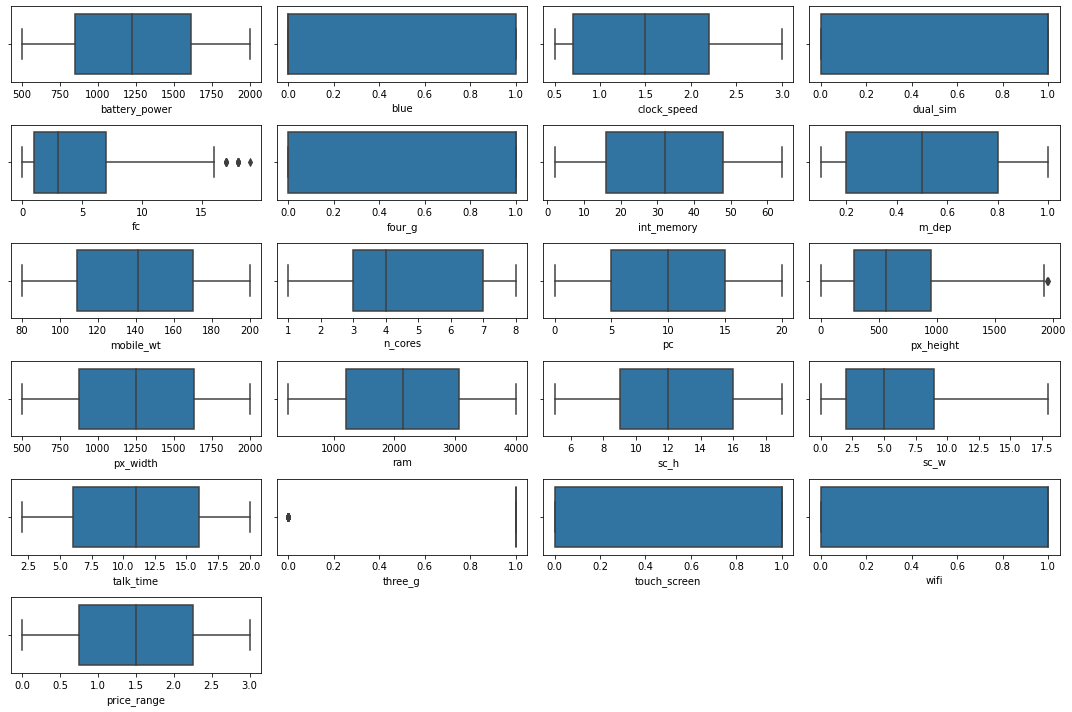

In [6]:
## Boxplot
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_col):
    plt.subplot(6,4,i+1)
    sns.boxplot(df[col])
    plt.tight_layout()

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.51850,439.418206,501.0,851.75,1226.0,1615.25,1998.0
blue,2000.0,0.49500,0.500100,0.0,0.00,0.0,1.00,1.0
clock_speed,2000.0,1.52225,0.816004,0.5,0.70,1.5,2.20,3.0
dual_sim,2000.0,0.50950,0.500035,0.0,0.00,1.0,1.00,1.0
fc,2000.0,4.30950,4.341444,0.0,1.00,3.0,7.00,19.0
four_g,2000.0,0.52150,0.499662,0.0,0.00,1.0,1.00,1.0
int_memory,2000.0,32.04650,18.145715,2.0,16.00,32.0,48.00,64.0
m_dep,2000.0,0.50175,0.288416,0.1,0.20,0.5,0.80,1.0
mobile_wt,2000.0,140.24900,35.399655,80.0,109.00,141.0,170.00,200.0
n_cores,2000.0,4.52050,2.287837,1.0,3.00,4.0,7.00,8.0


In [8]:
mobile_priceDESC = []

for i in df.columns:
    mobile_priceDESC.append([
    i,
    df[i].dtypes,
    df[i].isna().sum(),
    (((df[i].isna().sum())/len(df))*100).round(2),
    df[i].nunique(),
    df[i].drop_duplicates().sample(2).values
    ])
    
pd.DataFrame(data=mobile_priceDESC, columns=['feature_name', 'type', 'Null', 'Percentage Null', 'No Unique', 'Example Unique'])

,feature_name,type,Null,Percentage Null,No Unique,Example Unique
0,battery_power,int64,0,0.0,1094,"[983, 1450]"
1,blue,int64,0,0.0,2,"[1, 0]"
2,clock_speed,float64,0,0.0,26,"[2.4, 2.7]"
3,dual_sim,int64,0,0.0,2,"[1, 0]"
4,fc,int64,0,0.0,20,"[15, 16]"
5,four_g,int64,0,0.0,2,"[1, 0]"
6,int_memory,int64,0,0.0,63,"[39, 46]"
7,m_dep,float64,0,0.0,10,"[0.4, 0.8]"
8,mobile_wt,int64,0,0.0,121,"[87, 190]"
9,n_cores,int64,0,0.0,8,"[2, 1]"


#### Data Preparation

In [9]:
## Checking for balance/ imbalance data of target
(((df['price_range'].value_counts())/len(df))*100).round(2)

3    25.0
2    25.0
1    25.0
0    25.0
Name: price_range, dtype: float64

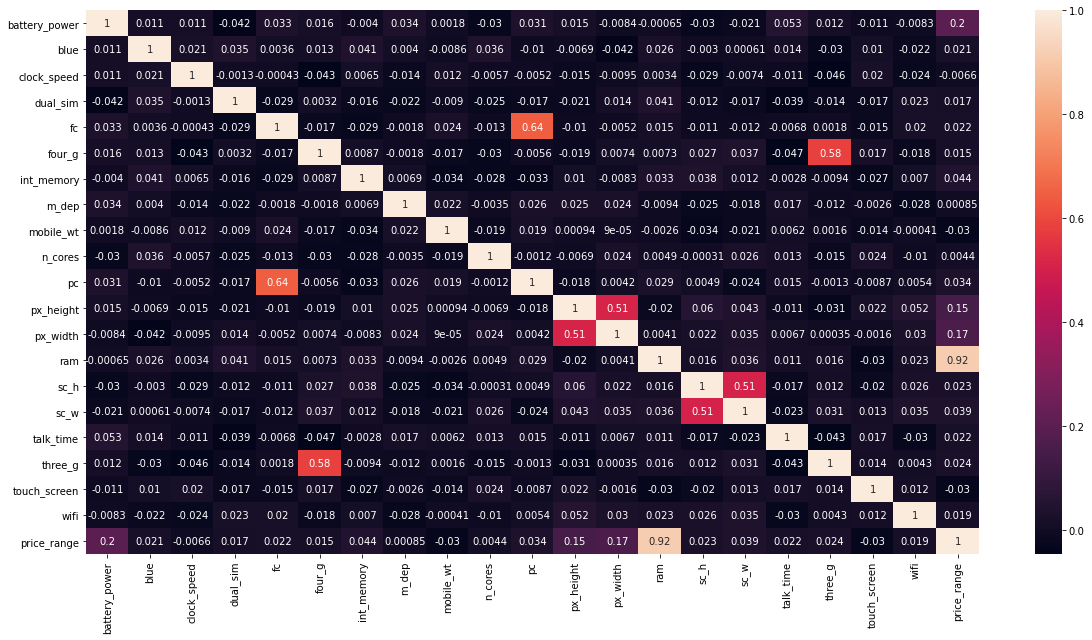

In [10]:
## Checking for correlation among features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

As we saw above, **price_range** has strong correlation with **ram**.\
Also:
- four_g and tree_g (0.58)
- fc and pc (0.64)
- px_height and px_width (0.51)
- sc_h and sc_w (0.51)

has positive correaltion.

In [11]:
##Correlation within Target
df.corr()['price_range'].sort_values(ascending=False)[1:]

ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

In [12]:
## Feature Selection
df.drop(columns=['n_cores','m_dep', 'clock_speed', 'wifi', 'dual_sim','four_g'], inplace=True)

# Dropping some features due to small correlation

In [13]:
## specify the features to x and y
x = df.drop(columns='price_range')
y = df['price_range']

In [14]:
x

,battery_power,blue,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen
0,842,0,1,7,188,2,20,756,2549,9,7,19,0,0
1,1021,1,0,53,136,6,905,1988,2631,17,3,7,1,1
2,563,1,2,41,145,6,1263,1716,2603,11,2,9,1,1
3,615,1,0,10,131,9,1216,1786,2769,16,8,11,1,0
4,1821,1,13,44,141,14,1208,1212,1411,8,2,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,2,106,14,1222,1890,668,13,4,19,1,1
1996,1965,1,0,39,187,3,915,1965,2032,11,10,16,1,1
1997,1911,0,1,36,108,3,868,1632,3057,9,1,5,1,1
1998,1512,0,4,46,145,5,336,670,869,18,10,19,1,1


In [15]:
df.head()

,battery_power,blue,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,price_range
0,842,0,1,7,188,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0,53,136,6,905,1988,2631,17,3,7,1,1,2
2,563,1,2,41,145,6,1263,1716,2603,11,2,9,1,1,2
3,615,1,0,10,131,9,1216,1786,2769,16,8,11,1,0,2
4,1821,1,13,44,141,14,1208,1212,1411,8,2,15,1,1,1


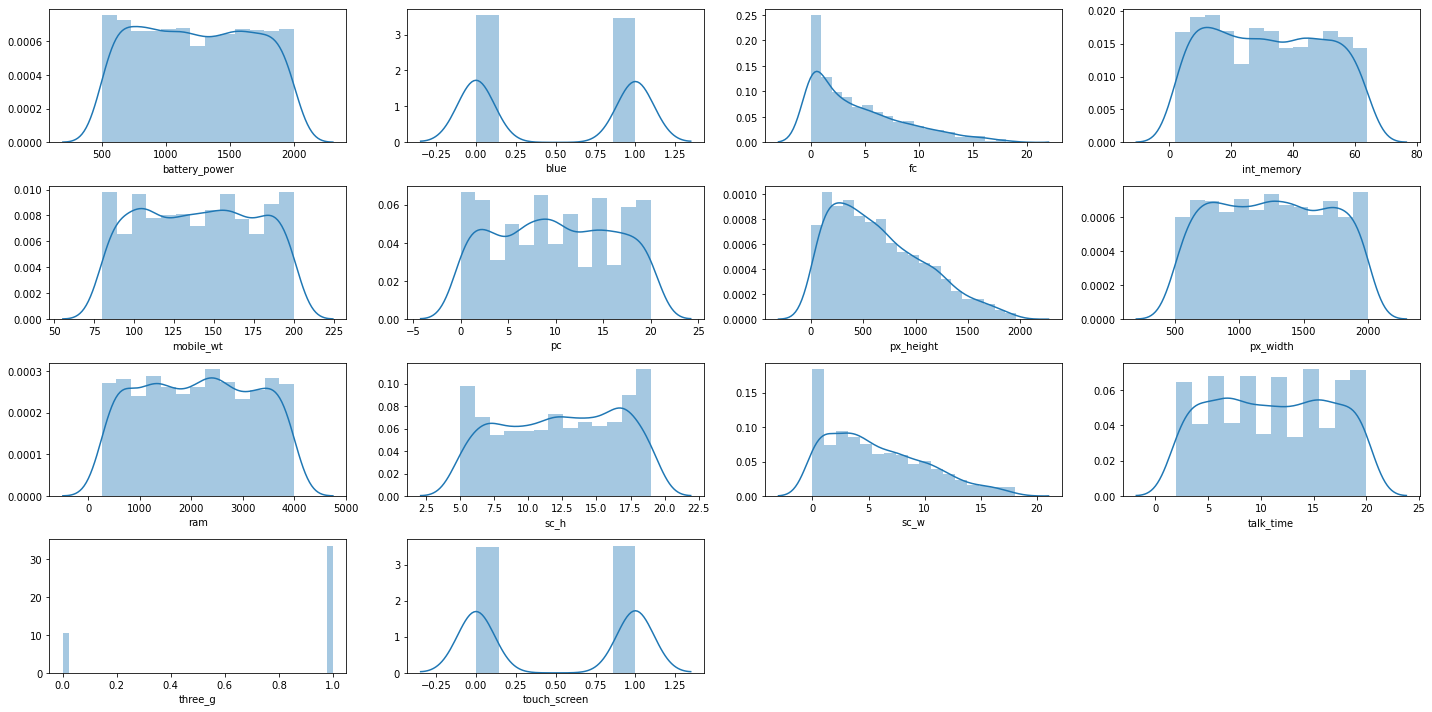

In [16]:
#Using distplot to know the distribution of features that will be scaled
plt.figure(figsize=(20,10))
for i, col in enumerate(x.columns):
    plt.subplot(4,4,i+1)
    sns.distplot(df[col])
plt.tight_layout()
plt.show()

#From the results, it showed that the features does not have normal distribution

In [22]:
## Robust Scaller

In [18]:
from sklearn.preprocessing import RobustScaler

In [19]:
scaling = RobustScaler()

In [20]:
x_scale = scaling.fit_transform(x)

In [21]:
X = x_scale
y = df['price_range']

### Machine Learning

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV

## Evaluation Matrix
from sklearn.metrics import classification_report, confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, make_scorer

from sklearn import set_config
set_config(print_changed_only=False)

In [22]:
## Train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = .2, random_state = 42)

In [25]:
# !pip install yellowbrick

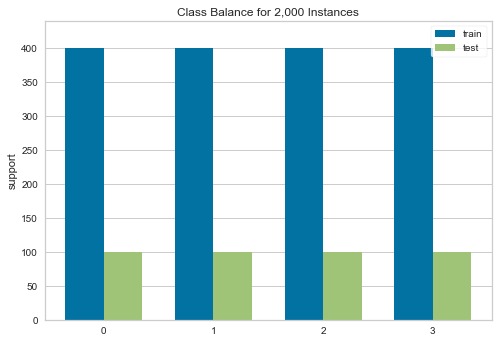

In [26]:
## Class Balance Visualization
from yellowbrick.target import ClassBalance
visualizer = ClassBalance(labels=[0, 1, 2,3])
visualizer.fit(y_train, y_test)
visualizer.poof()

### SVC

In [27]:
from sklearn.svm import SVC

In [28]:
svm=SVC(random_state=42)

In [29]:
svm.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

In [30]:
y_base=svm.predict(X_test)

In [101]:
acc_svc = accuracy_score(y_test, y_base)
prec_svc = precision_score(y_test, y_base, average='micro')
rec_svc= recall_score(y_test, y_base, average='micro')
f1_svc=f1_score(y_test, y_base, average='micro')

In [102]:
print(classification_report(y_test, y_base, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.98      0.97      0.97       100
     class 1       0.91      0.91      0.91       100
     class 2       0.82      0.91      0.86       100
     class 3       0.97      0.87      0.92       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [33]:
cm_base_svm= confusion_matrix(y_test, y_base)
df_base_svm = pd.DataFrame(data=cm_base_svm, index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'], columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3' ])

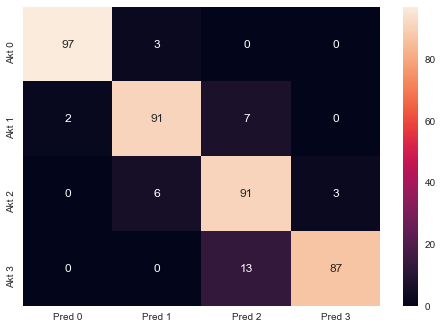

In [34]:
sns.heatmap(df_base_svm, annot=True)

### KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
modelKNN = KNeighborsClassifier()

In [37]:
modelKNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [38]:
y_KNN = modelKNN.predict(X_test)

In [103]:
acc_KNN = accuracy_score(y_test, y_KNN)
prec_KNN = precision_score(y_test, y_KNN, average='micro')
rec_KNN= recall_score(y_test, y_KNN, average='micro')
f1_KNN=f1_score(y_test, y_KNN, average='micro')

print(classification_report(y_test, y_KNN, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.72      0.78      0.75       100
     class 1       0.45      0.58      0.51       100
     class 2       0.48      0.40      0.44       100
     class 3       0.82      0.65      0.73       100

    accuracy                           0.60       400
   macro avg       0.62      0.60      0.60       400
weighted avg       0.62      0.60      0.60       400



In [40]:
cm_base_knn= confusion_matrix(y_test, y_KNN)
df_base_knn = pd.DataFrame(data=cm_base_knn, index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'], columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3' ])

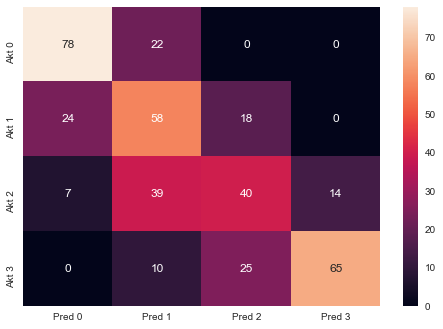

In [41]:
sns.heatmap(df_base_knn, annot=True)

### Random Forest

In [42]:
## Since RF is based on tree so I will just use features before scale
x

,battery_power,blue,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen
0,842,0,1,7,188,2,20,756,2549,9,7,19,0,0
1,1021,1,0,53,136,6,905,1988,2631,17,3,7,1,1
2,563,1,2,41,145,6,1263,1716,2603,11,2,9,1,1
3,615,1,0,10,131,9,1216,1786,2769,16,8,11,1,0
4,1821,1,13,44,141,14,1208,1212,1411,8,2,15,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0,2,106,14,1222,1890,668,13,4,19,1,1
1996,1965,1,0,39,187,3,915,1965,2032,11,10,16,1,1
1997,1911,0,1,36,108,3,868,1632,3057,9,1,5,1,1
1998,1512,0,4,46,145,5,336,670,869,18,10,19,1,1


In [43]:
## Train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size = .2, random_state = 42)

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
modelRF = RandomForestClassifier()

In [46]:
modelRF.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
y_predRF = modelRF.predict(x_test)

In [104]:
acc_RF = accuracy_score(y_test, y_predRF)
prec_RF = precision_score(y_test, y_predRF, average='micro')
rec_RF= recall_score(y_test, y_predRF, average='micro')
f1_RF=f1_score(y_test, y_predRF, average='micro')

print(classification_report(y_test, y_predRF, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.95      0.97      0.96       100
     class 1       0.89      0.82      0.85       100
     class 2       0.82      0.88      0.85       100
     class 3       0.95      0.94      0.94       100

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



In [49]:
cm_base_rf= confusion_matrix(y_test, y_predRF)
df_base_rf = pd.DataFrame(data=cm_base_rf, index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'], columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3' ])

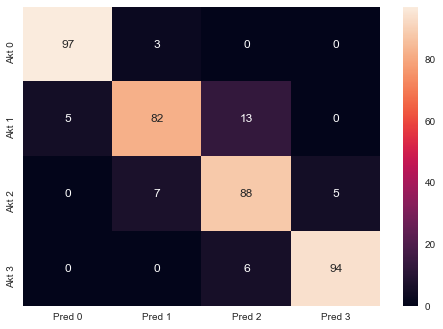

In [50]:
sns.heatmap(df_base_rf, annot=True)

### Optimize Model - Hyper Parameter Tuning

### 1. Tuning SVC

In [62]:
tune_1 = SVC(max_iter = 400)

In [63]:
param_svm = {
    'C':[1, 0.001, 0.01, 0.1, 10, 100, 1000],
    'kernel':['rbf', 'linear'],
    'gamma':[1, 0.001, 0.01, 0.1, 10, 100, 1000]
}

In [66]:
score = make_scorer(recall_score, average='micro')
model_tuned = GridSearchCV(estimator=tune_1, param_grid=param_svm, cv=3, n_jobs=-1, verbose=1, scoring=score)

In [67]:
model_tuned.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 279 out of 294 | elapsed:    9.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 294 out of 294 | elapsed:   10.4s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=400,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'gamma': [1, 0.001, 0.01, 0.1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make_scorer(recall_score, average=micro), verbose=1)

In [68]:
SVC_Tuned = model_tuned.best_estimator_

In [69]:
y_pred_tuned = SVC_Tuned.predict(X_test)

In [105]:
acc_SVC_tuned = accuracy_score(y_test, y_pred_tuned)
prec_SVC_tuned = precision_score(y_test, y_pred_tuned, average='micro')
rec_SVC_tuned= recall_score(y_test, y_pred_tuned, average='micro')
f1_SVC_tuned=f1_score(y_test, y_pred_tuned, average='micro')

print(classification_report(y_test, y_pred_tuned, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.99      0.98      0.98       100
     class 1       0.96      0.95      0.95       100
     class 2       0.94      0.95      0.95       100
     class 3       0.97      0.98      0.98       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.96      0.97       400



In [71]:
cm_tuned_svc= confusion_matrix(y_test, y_pred_tuned)
df_tuned_svc = pd.DataFrame(data=cm_tuned_svc, index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'], columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3' ])

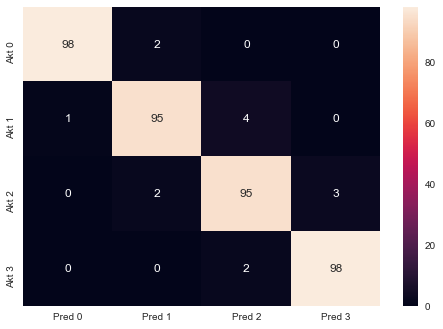

In [72]:
sns.heatmap(df_tuned_svc, annot=True)

### 2. Tuning KNN

In [73]:
tune_2 = KNeighborsClassifier()

In [74]:
param_KNN ={'n_neighbors' : [5, 15, 25, 35, 75], 
           'weights':['uniform', 'distance'],
           'p': [1,2] 
           }

In [75]:
model_KNN = GridSearchCV(estimator = tune_2, 
                         param_grid = param_KNN, 
                         n_jobs = -1, 
                         cv = 5,
                         verbose = 1 
                        )

In [76]:
model_KNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=-1,
             param_grid={'n_neighbors': [5, 15, 25, 35, 75], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [77]:
model_KNN.best_params_

{'n_neighbors': 75, 'p': 1, 'weights': 'distance'}

In [78]:
KNN_Tuned = model_KNN.best_estimator_

In [79]:
y_tunedKNN = KNN_Tuned.predict(X_test)

In [106]:
acc_KNN_tuned = accuracy_score(y_test, y_tunedKNN)
prec_KNN_tuned = precision_score(y_test, y_tunedKNN, average='micro')
rec_KNN_tuned= recall_score(y_test, y_tunedKNN, average='micro')
f1_KNN_tuned=f1_score(y_test, y_tunedKNN, average='micro')

print(classification_report(y_test, y_tunedKNN, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.92      0.94      0.93       100
     class 1       0.75      0.72      0.73       100
     class 2       0.68      0.77      0.72       100
     class 3       0.94      0.84      0.89       100

    accuracy                           0.82       400
   macro avg       0.82      0.82      0.82       400
weighted avg       0.82      0.82      0.82       400



In [81]:
cm_tuned_knn= confusion_matrix(y_test, y_tunedKNN)
df_tuned_knn = pd.DataFrame(data=cm_tuned_knn, index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'], columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3' ])

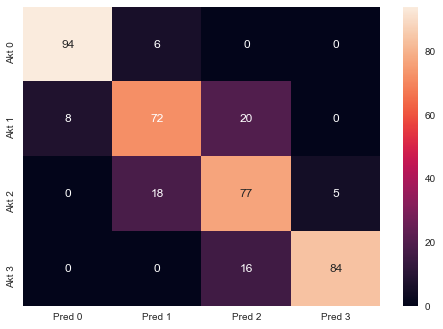

In [82]:
sns.heatmap(df_tuned_knn, annot=True)

### 3. Tuning Random Forest

In [84]:
RF = RandomForestClassifier()

In [88]:
param_RF = {'n_estimators': [100, 200, 500, 900],
           'max_depth':[None, 5,17,39],
           'min_samples_split':[2,9,35],
           'min_samples_leaf':[1,2,17],
           'max_features':[None, .7, .6]}

In [89]:
model_RF = GridSearchCV(estimator=RF, param_grid=param_RF, cv=4, n_jobs=-1, verbose=1)

In [90]:
model_RF.fit(x_train, y_train)

Fitting 4 folds for each of 432 candidates, totalling 1728 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 1728 out of 1728 | elapsed: 14.9min finished


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [91]:
model_RF.best_params_

{'max_depth': None,
 'max_features': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [92]:
RF_Tuned = model_RF.best_estimator_

In [93]:
y_tunedRF = RF_Tuned.predict(x_test)

In [111]:
acc_RF_tuned = accuracy_score(y_test, y_tunedRF)
prec_RF_tuned = precision_score(y_test, y_tunedRF, average='micro')
rec_RF_tuned= recall_score(y_test, y_tunedRF, average='micro')
f1_RF_tuned=f1_score(y_test, y_tunedRF, average='micro')

print(classification_report(y_test, y_tunedRF, target_names=['class 0', 'class 1', 'class 2', 'class 3']))

              precision    recall  f1-score   support

     class 0       0.96      0.96      0.96       100
     class 1       0.89      0.89      0.89       100
     class 2       0.88      0.88      0.88       100
     class 3       0.95      0.95      0.95       100

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



In [95]:
cm_tuned_RF= confusion_matrix(y_test, y_tunedRF)
df_tuned_RF = pd.DataFrame(data=cm_tuned_RF, index=['Akt 0', 'Akt 1', 'Akt 2', 'Akt 3'], columns=['Pred 0', 'Pred 1', 'Pred 2', 'Pred 3' ])

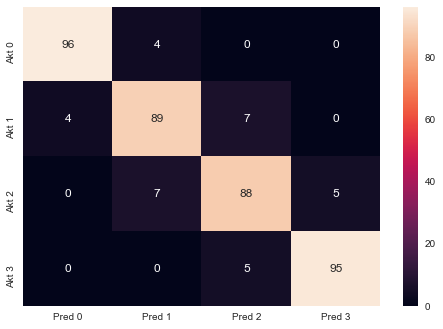

In [96]:
sns.heatmap(df_tuned_RF, annot=True)

### Evaluation Matrix

In [108]:
eva_mat = {
    'SVC':[acc_svc, prec_svc, rec_svc, f1_svc],
    'SVC Tuned':[acc_SVC_tuned, prec_SVC_tuned, rec_SVC_tuned, f1_SVC_tuned],
    'KNN':[acc_KNN, prec_KNN, rec_KNN, f1_KNN],
    'KNN Tuned':[acc_KNN_tuned, prec_KNN_tuned, rec_KNN_tuned, f1_KNN_tuned],
    'Random Forest':[acc_RF, prec_RF, rec_RF, f1_RF],
    'Random Forest tuned':[acc_RF_tuned, prec_RF_tuned, rec_RF_tuned, f1_RF_tuned]
}

In [109]:
pd.DataFrame(data= eva_mat, index=['Accuracy', 'Precision', 'Recall', 'F1-Score'])

,SVC,SVC Tuned,KNN,KNN Tuned,Random Forest,Random Forest tuned
Accuracy,0.915,0.965,0.6025,0.8175,0.9025,0.92
Precision,0.915,0.965,0.6025,0.8175,0.9025,0.92
Recall,0.915,0.965,0.6025,0.8175,0.9025,0.92
F1-Score,0.915,0.965,0.6025,0.8175,0.9025,0.92


Since the data balance, we could see the accuracy for classified the  the price of mobile phone. Its turn out that **SVC Tuned** has the highest accuracy among others.